In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
neldermead = pd.concat([
    pd.read_pickle(".cache_3/nelder-mead-fdf-mae.pkl"),
    pd.read_pickle(".cache_3/nelder-mead-fdf.pkl"),
    pd.read_pickle(".cache_3/nelder-mead-fdf-log.pkl")
], ignore_index=True)
powell = pd.concat([
    pd.read_pickle(".cache_3/powell-fdf-mae.pkl"),
    pd.read_pickle(".cache_3/powell-fdf.pkl"),
    pd.read_pickle(".cache_3/powell-fdf-log.pkl"),
], ignore_index=True)
cobyla = pd.concat([
    pd.read_pickle(".cache_3/cobyla-fdf-mae.pkl"),
    pd.read_pickle(".cache_3/cobyla-fdf-mse.pkl"),
    pd.read_pickle(".cache_3/cobyla-fdf-log.pkl"),
    pd.read_pickle(".cache_3/cobyla-fdf-mae-1e-3.pkl"),
    pd.read_pickle(".cache_3/cobyla-fdf-mse-1e-3.pkl"),
    pd.read_pickle(".cache_3/cobyla-fdf-log-1e-3.pkl")
], ignore_index=True)
bayesian = pd.concat([
    pd.read_pickle(".cache_3/bayesian2-mae.pkl"),
    pd.read_pickle(".cache_3/bayesian2-mse.pkl"),
    pd.read_pickle(".cache_3/bayesian2-log.pkl")
], ignore_index=True)
randomsearch = pd.concat([
    pd.read_pickle(".cache_3/random-search-100.pkl"),
    pd.read_pickle(".cache_3/random-search-200.pkl"),
    pd.read_pickle(".cache_3/random-search.pkl"),
    pd.read_pickle(".cache_3/random-search-300b.pkl"),
    pd.read_pickle(".cache_3/random-search-1000.pkl")
], ignore_index=True)
nothing = pd.read_pickle(".cache_3/nothing.pkl")
reset = pd.concat([
    pd.read_pickle(".cache_3/set-fdf-10.pkl"),
    pd.read_pickle(".cache_3/set-zero.pkl")
], ignore_index=True)

models = ["polished-donkey-996", "polar-lake-997", "still-deluge-998"]
rl = pd.concat([pd.read_pickle(f".cache_3/{model}.pkl") for model in models], ignore_index=True)

In [3]:
rl["method"] = "reinforcement-learning"
neldermead.loc[neldermead["method"] == "nelder-mead-fdf","method"] = "nelder-mead-fdf-mse"
powell.loc[powell["method"] == "powell-fdf","method"] = "powell-fdf-mse"
randomsearch.loc[randomsearch["method"] == "random-search","method"] = "random-search-300"

In [4]:
evaluation = pd.concat([neldermead,powell,cobyla,bayesian,randomsearch,nothing,reset,rl], ignore_index=True)

In [5]:
# Compute MAE
evaluation["delta_mu_x"] = np.abs(evaluation["mup_x"] - evaluation["mu_x"])
evaluation["delta_mu_y"] = np.abs(evaluation["mup_y"] - evaluation["mu_y"])
evaluation["delta_sigma_x"] = np.abs(evaluation["sigmap_x"] - evaluation["sigma_x"])
evaluation["delta_sigma_y"] = np.abs(evaluation["sigmap_y"] - evaluation["sigma_y"])
evaluation["mae"] = (evaluation["delta_mu_x"] + evaluation["delta_mu_y"] + evaluation["delta_sigma_x"] + evaluation["delta_sigma_y"]) / 4

In [6]:
leq30 = evaluation["step"] <= 30
notrl = evaluation["method"] != "reinforcement-learning"
# opt = evaluation["model"].isin(["nelder-mead","bayesian2-mae","bayesian2-mse","bayesian2-log","random-search"])

evaluation30 = evaluation[notrl | leq30]

In [7]:
finals = evaluation30.groupby(["model","problem"]).apply(lambda x: x.loc[x["step"].idxmax()])
finals = finals.drop(["model","problem"], axis=1).reset_index()

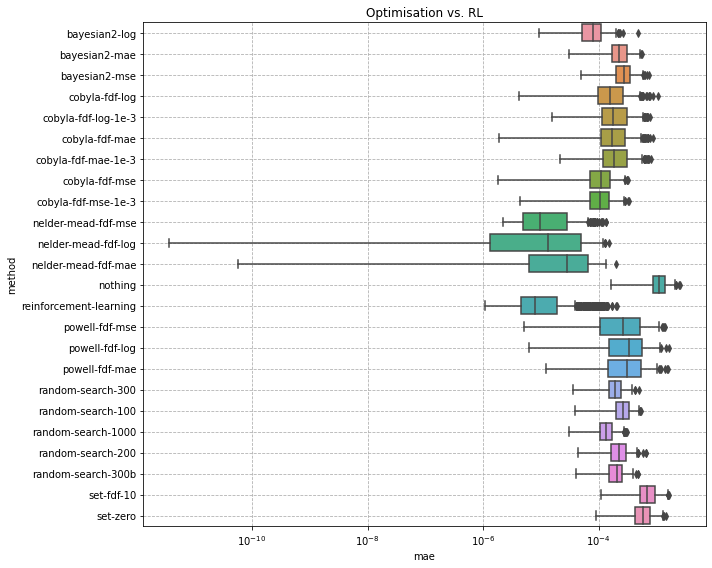

In [8]:
plt.figure(figsize=(10,8))
plt.title("Optimisation vs. RL")
sns.boxplot(x="mae", y="method", data=finals)
plt.xscale("log")
# plt.gca().xaxis.grid()
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

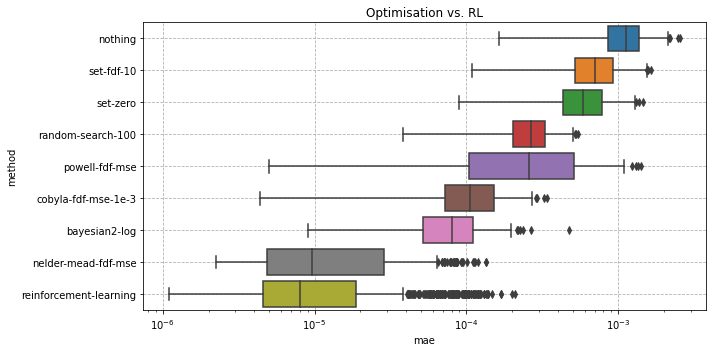

method
bayesian2-log             0.000081
cobyla-fdf-mse-1e-3       0.000105
nelder-mead-fdf-mse       0.000010
nothing                   0.001122
powell-fdf-mse            0.000259
random-search-100         0.000267
reinforcement-learning    0.000008
set-fdf-10                0.000699
set-zero                  0.000588
Name: mae, dtype: float64

In [9]:
simpler_finals = finals[finals["method"].isin([
    "bayesian2-log",
    "cobyla-fdf-mse-1e-3",
    "nelder-mead-fdf-mse",
    "nothing",
    "reinforcement-learning",
    "powell-fdf-mse",
    "random-search-100",
    "set-fdf-10",
    "set-zero"
])].copy()
meds = simpler_finals.groupby("method")["mae"].median()
for x in meds.index:
    simpler_finals.loc[simpler_finals["method"] == x,"mae_median"] = meds.loc[x]
simpler_finals.sort_values("mae_median", ascending=False, inplace=True)

plt.figure(figsize=(10,5))
plt.title("Optimisation vs. RL")
sns.boxplot(x="mae", y="method", data=simpler_finals)
plt.xscale("log")
# plt.gca().xaxis.grid()
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

meds

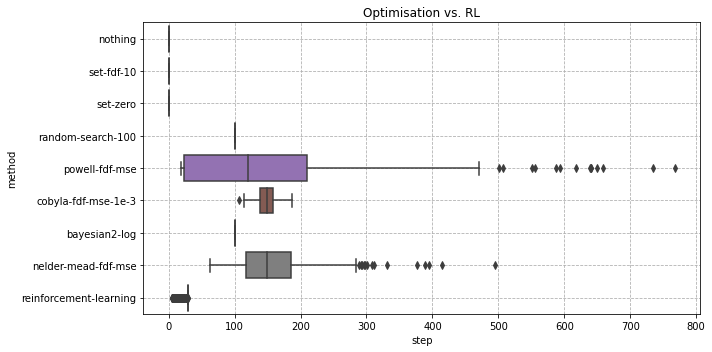

method
bayesian2-log             101.0
cobyla-fdf-mse-1e-3       149.0
nelder-mead-fdf-mse       148.5
nothing                     0.0
powell-fdf-mse            120.5
random-search-100         101.0
reinforcement-learning     30.0
set-fdf-10                  0.0
set-zero                    0.0
Name: step, dtype: float64

In [10]:
plt.figure(figsize=(10,5))
plt.title("Optimisation vs. RL")
sns.boxplot(x="step", y="method", data=simpler_finals)
# plt.xscale("log")
# plt.gca().xaxis.grid()
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

simpler_finals.groupby("method")["step"].median()

In [8]:
simpler_evaluation30 = evaluation30[evaluation30["method"].isin([
    "bayesian2-log",
    "cobyla-fdf-mse-1e-3",
    "nelder-mead-fdf-mse",
    "nothing",
    "reinforcement-learning",
    "powell-fdf-mse",
    "random-search-100",
    "set-fdf-10",
    "set-zero"
])].copy()

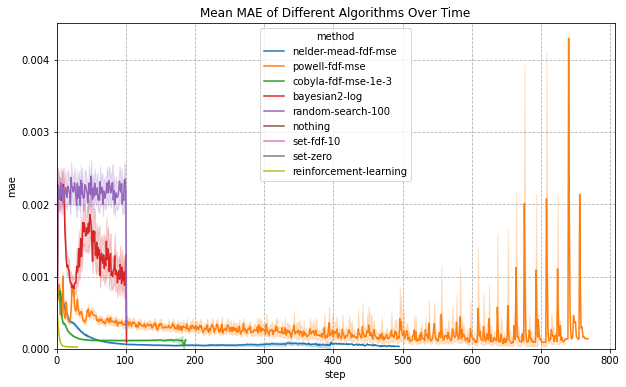

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="step", y="mae", hue="method", data=simpler_evaluation30)
plt.title("Mean MAE of Different Algorithms Over Time")
plt.xlim(0, None)
plt.ylim(0, None)
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

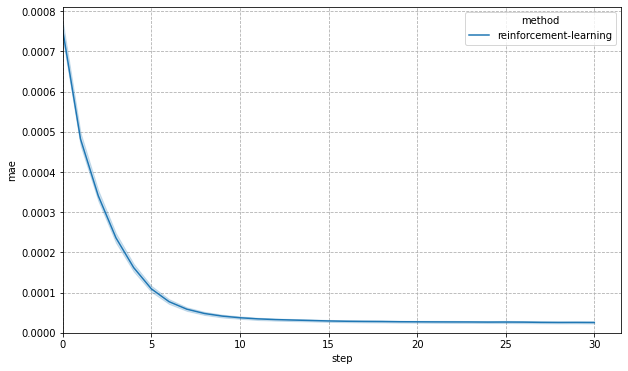

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="step", y="mae", hue="method", data=simpler_evaluation30[simpler_evaluation30["method"] == "reinforcement-learning"])
plt.xlim(0, None)
plt.ylim(0, None)
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

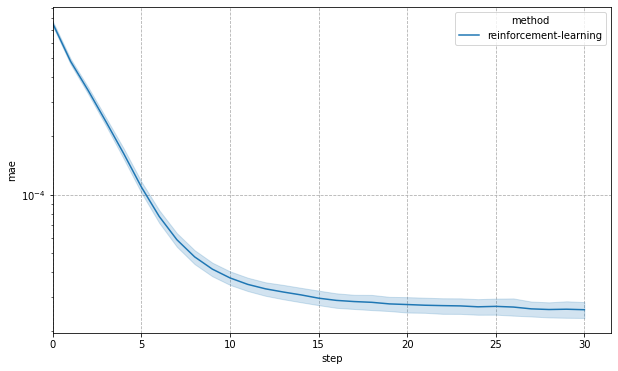

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="step", y="mae", hue="method", data=simpler_evaluation30[simpler_evaluation30["method"] == "reinforcement-learning"])
plt.xlim(0, None)
# plt.ylim(0, None)
plt.yscale("log")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="step", y="mae", hue="method", data=simpler_evaluation30[simpler_evaluation30["method"] == "reinforcement-learning"])
plt.xlim(0, None)
# plt.ylim(0, None)
plt.yscale("log")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

In [9]:
is_nelder = evaluation["method"] == "nelder-mead-fdf"
is_p0 = evaluation["problem"] == 0

problem_000 = evaluation[is_nelder & is_p0]

In [10]:
print(problem_000.loc[1,"mup_x"])
print(problem_000.loc[1,"mup_y"])
print(problem_000.loc[1,"sigmap_x"])
print(problem_000.loc[1,"sigmap_y"])

0.0
0.0
0.0
0.0


In [11]:
problem_000[["mu_x","mu_y","sigma_x","sigma_y"]]

,mu_x,mu_y,sigma_x,sigma_y
0,-0.000176,0.001560,0.000228,0.000269
1,-0.000176,0.001560,0.000228,0.000269
2,-0.000179,0.001637,0.000260,0.000283
3,-0.000176,0.001469,0.000221,0.000246
4,-0.000178,0.001593,0.000226,0.000277
...,...,...,...,...
179,-0.000006,0.000004,0.000023,0.000083
180,0.000010,0.000003,0.000022,0.000085
181,-0.000006,-0.000003,0.000021,0.000084
182,-0.000010,0.000012,0.000020,0.000083


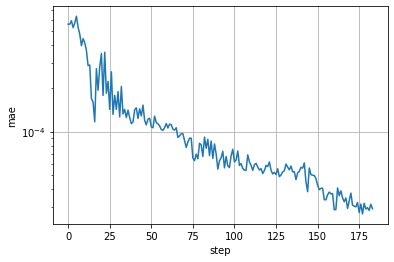

In [12]:
sns.lineplot(x="step", y="mae", data=problem_000)
plt.yscale("log")
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

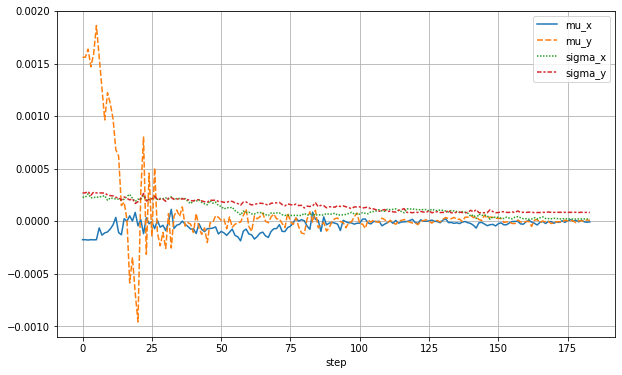

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=problem_000.set_index("step")[["mu_x","mu_y","sigma_x","sigma_y"]])
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

In [15]:
foo = evaluation[evaluation["method"] == "random-search-300"]
foo = foo[foo["problem"] == 0]

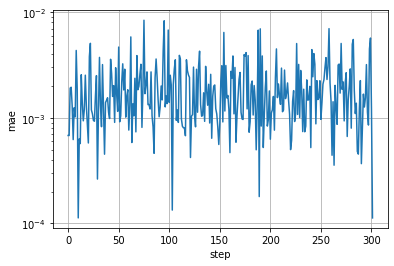

In [16]:
sns.lineplot(x="step", y="mae", data=foo)
plt.yscale("log")
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

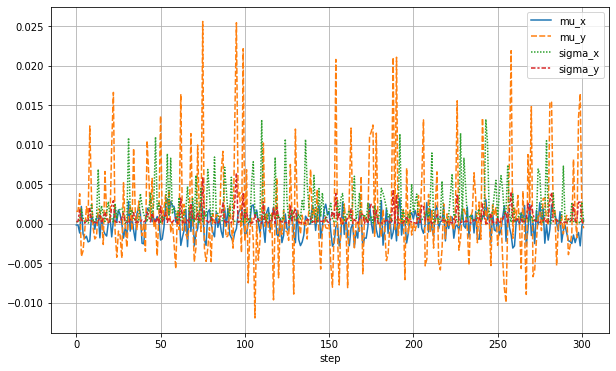

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=foo.set_index("step")[["mu_x","mu_y","sigma_x","sigma_y"]])
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()